In [444]:
import pandas as pd
pd.set_option('display.max_columns', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from dateutil import parser

In [445]:
df1 = pd.read_excel('l2_data.xlsx', 'L2 raw data')
df2 = pd.read_excel('l2_data.xlsx', 'PO level')
df2 = df2[df2['order_status'].str.lower() == 'completed']
# df2 = df2[['buyer_name', 'seller_name', 'seller_po_number', 'seller_po_status', 'transporter_type' , 'seller_po_creation_date', 'buyer_invoice_item_quantity', 'po_quantity', 'order_completion_percentage', 'o2d_']]
df1.head()

,sno,po_number,po_qty,seller_po_creation_date,category,dispatched_qty,origin,destination,dispatch_week,po_ts,nextbuy_order_indent_ts,nextbuy_vehicle_indent_ts,transporter_order_indent_ts,transporter_order_indent_acceptance_ts,vehicle_placement_ts,expected_date_of_vehicle_reporting,vehicle_reported_ts,vehicle_loaded_ts,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,vehicle_level_o2d,vehicle_level_o2dqty,O2D_
0,1,PO/25/MH/96,60.0,2024-04-12 13:50:32.410,RMC - Aluminium,29.709999,Raipur,Gandhinagar,April 2 Week,04-12-2024 19:20:32,4/12/2024 20:07:00,4/12/2024 20:07:00,4/12/2024 20:12:00,4/12/2024 20:45:00,4/13/2024 11:52:00,4/13/2024 23:59:59,4/13/2024 12:51:00,4/13/2024 15:57:00,4/13/2024 18:02:00,4/16/2024 9:55:00,4/16/2024 10:15:00,4/16/2024 13:30:00,0.032280,0.000012,0.656262,0.040984,0.215984,-0.464583,0.003484,0.945463,28.085899,0.945335
1,2,PO/25/MH/73,300.0,2024-04-10 13:23:40.897,RMC - Steel,39.230000,Raipur,Jalna,April 3 Week,04/10/2024 18:53:40,4/12/2024 20:40:00,4/12/2024 20:40:00,4/12/2024 20:55:00,4/12/2024 21:40:00,4/13/2024 18:22:00,4/14/2024 23:59:59,4/14/2024 7:26:00,4/15/2024 14:10:00,4/15/2024 15:32:00,4/18/2024 9:00:00,4/18/2024 10:12:00,4/19/2024 10:45:00,2.073854,0.000012,0.904178,0.544456,1.337512,-0.690278,0.010428,4.859950,190.656006,4.859954
2,3,PO/25/MH/73,300.0,2024-04-10 13:23:40.897,RMC - Steel,34.189999,Raipur,Jalna,April 3 Week,04/10/2024 18:53:40,4/12/2024 20:40:00,4/12/2024 20:40:00,4/12/2024 20:55:00,4/12/2024 21:40:00,4/13/2024 18:22:00,4/14/2024 23:59:59,4/14/2024 7:26:00,4/15/2024 16:37:00,4/15/2024 17:20:00,4/18/2024 12:00:00,4/18/2024 12:00:00,4/19/2024 11:30:00,2.073854,0.000012,0.904178,0.544456,1.412512,-0.690278,0.010428,4.934950,168.725998,4.934952
3,4,PO/25/MH/96,60.0,2024-04-12 13:50:32.410,RMC - Aluminium,29.260000,Raipur,Gandhinagar,April 3 Week,04-12-2024 19:20:32,4/12/2024 20:07:00,4/14/2024 21:50:00,4/12/2024 20:12:00,4/12/2024 20:45:00,4/15/2024 11:55:00,4/15/2024 23:59:59,4/15/2024 13:30:00,4/15/2024 17:55:00,4/15/2024 19:30:00,4/17/2024 20:00:00,4/18/2024 15:20:00,4/18/2024 16:30:00,0.032280,2.071539,0.586817,0.065984,0.250012,-0.437500,0.003484,3.006570,87.966301,3.006367
4,5,PO/25/HA/111,600.0,2024-04-16 12:24:35.313,RMC - Steel,25.129999,Durgapur,Sikendarabad,April 3 Week,04/16/2024 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,4/22/2024 11:00:00,4/19/2024 23:59:59,04/24/24 4:05:00,04/24/24 14:02:00,04/24/2024 22:15:00,4/26/2024 23:00:00,04/27/2024 16:15:00,04/28/2024 15:00:00,0.936412,0.000012,4.775706,1.711817,0.756956,4.170139,0.747928,8.180850,205.585007,8.180860


In [407]:
df2[['transporter_type']].value_counts()

transporter_type
Seller              201
Bizongo              17
Name: count, dtype: int64

In [408]:
df2.groupby('transporter_type')['o2d_'].mean()

transporter_type
Bizongo    6.590171
Seller     3.523579
Name: o2d_, dtype: float64

In [446]:
df = df1.merge(df2, left_on='po_number', right_on = 'seller_po_number', how = 'outer')

# df['vehicle_unloaded_ts'] = pd.to_datetime(df['vehicle_unloaded_ts'], format='%m/%d/%y %H:%M:%S')
# df = df.sort_values(by=['po_number', 'vehicle_unloaded_ts'])
# df['cumulative_rank'] = df.groupby('po_number')['dispatched_qty'].rank(method='first')

# df['order'] = df.groupby('po_number')['dispatched_qty'].rank(method='first')
# print(df.shape)
# df.head()

In [447]:
df.head()

,sno,po_number,po_qty,seller_po_creation_date_x,category,dispatched_qty,origin,destination,dispatch_week,po_ts,nextbuy_order_indent_ts,nextbuy_vehicle_indent_ts,transporter_order_indent_ts,transporter_order_indent_acceptance_ts,vehicle_placement_ts,expected_date_of_vehicle_reporting,vehicle_reported_ts,vehicle_loaded_ts,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,vehicle_level_o2d,vehicle_level_o2dqty,O2D_,buyer_name,seller_name,seller_po_number,seller_po_status,transporter_type,rmc_category,seller_po_creation_date_y,max_buyer_invoice_date,buyer_invoice_item_quantity,po_quantity,order_completion_percentage,order_status,o2d_,o2d_real,O2D_Bucket,Tons_Bucket
0,1,PO/25/MH/96,60.0,2024-04-12 13:50:32.410,RMC - Aluminium,29.709999,Raipur,Gandhinagar,April 2 Week,04-12-2024 19:20:32,4/12/2024 20:07:00,4/12/2024 20:07:00,4/12/2024 20:12:00,4/12/2024 20:45:00,4/13/2024 11:52:00,4/13/2024 23:59:59,4/13/2024 12:51:00,4/13/2024 15:57:00,4/13/2024 18:02:00,4/16/2024 9:55:00,4/16/2024 10:15:00,4/16/2024 13:30:00,0.032280,0.000012,0.656262,0.040984,0.215984,-0.464583,0.003484,0.945463,28.085899,0.945335,ADITYA METAL INDUSTRIES,KANSAL METAL PRIVATE LIMITED,PO/25/MH/96,Accepted,Bizongo,Aluminum,2024-04-12,2024-04-15,58.964,60.0,98.273333,Completed,1.992402,3.0,0-3 days,0-200 Tons
1,4,PO/25/MH/96,60.0,2024-04-12 13:50:32.410,RMC - Aluminium,29.260000,Raipur,Gandhinagar,April 3 Week,04-12-2024 19:20:32,4/12/2024 20:07:00,4/14/2024 21:50:00,4/12/2024 20:12:00,4/12/2024 20:45:00,4/15/2024 11:55:00,4/15/2024 23:59:59,4/15/2024 13:30:00,4/15/2024 17:55:00,4/15/2024 19:30:00,4/17/2024 20:00:00,4/18/2024 15:20:00,4/18/2024 16:30:00,0.032280,2.071539,0.586817,0.065984,0.250012,-0.437500,0.003484,3.006570,87.966301,3.006367,ADITYA METAL INDUSTRIES,KANSAL METAL PRIVATE LIMITED,PO/25/MH/96,Accepted,Bizongo,Aluminum,2024-04-12,2024-04-15,58.964,60.0,98.273333,Completed,1.992402,3.0,0-3 days,0-200 Tons
2,2,PO/25/MH/73,300.0,2024-04-10 13:23:40.897,RMC - Steel,39.230000,Raipur,Jalna,April 3 Week,04/10/2024 18:53:40,4/12/2024 20:40:00,4/12/2024 20:40:00,4/12/2024 20:55:00,4/12/2024 21:40:00,4/13/2024 18:22:00,4/14/2024 23:59:59,4/14/2024 7:26:00,4/15/2024 14:10:00,4/15/2024 15:32:00,4/18/2024 9:00:00,4/18/2024 10:12:00,4/19/2024 10:45:00,2.073854,0.000012,0.904178,0.544456,1.337512,-0.690278,0.010428,4.859950,190.656006,4.859954,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,PO/25/MH/73,Accepted,Bizongo,Steel,2024-04-10,2024-04-25,299.880,300.0,99.960000,Completed,9.350140,15.0,6+ days,200-400 Tons
3,3,PO/25/MH/73,300.0,2024-04-10 13:23:40.897,RMC - Steel,34.189999,Raipur,Jalna,April 3 Week,04/10/2024 18:53:40,4/12/2024 20:40:00,4/12/2024 20:40:00,4/12/2024 20:55:00,4/12/2024 21:40:00,4/13/2024 18:22:00,4/14/2024 23:59:59,4/14/2024 7:26:00,4/15/2024 16:37:00,4/15/2024 17:20:00,4/18/2024 12:00:00,4/18/2024 12:00:00,4/19/2024 11:30:00,2.073854,0.000012,0.904178,0.544456,1.412512,-0.690278,0.010428,4.934950,168.725998,4.934952,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,PO/25/MH/73,Accepted,Bizongo,Steel,2024-04-10,2024-04-25,299.880,300.0,99.960000,Completed,9.350140,15.0,6+ days,200-400 Tons
4,6,PO/25/MH/73,300.0,2024-04-10 13:23:40.897,RMC - Steel,42.610001,Raipur,Jalna,April 3 Week,04/10/2024 18:53:40,4/12/2024 20:40:00,4/14/2024 20:30:00,4/12/2024 20:55:00,4/12/2024 21:40:00,4/14/2024 20:30:00,4/15/2024 23:59:59,4/15/2024 11:00:00,4/16/2024 20:00:00,4/16/2024 21:30:00,4/19/2024 20:30:00,4/20/2024 12:23:00,4/21/2024 19:43:00,2.073854,1.993067,0.000012,0.604178,1.437512,-0.541667,0.010428,6.108560,260.286011,6.108566,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,PO/25/MH/73,Accepted,Bizongo,Steel,2024-04-10,2024-04-25,299.880,300.0,99.960000,Completed,9.350140,15.0,6+ days,20

In [ ]:
df.sort_values(by = ['po_number', ''])

In [421]:
df.head()

,sno,po_number,po_qty,seller_po_creation_date_x,category,dispatched_qty,origin,destination,dispatch_week,po_ts,nextbuy_order_indent_ts,nextbuy_vehicle_indent_ts,transporter_order_indent_ts,transporter_order_indent_acceptance_ts,vehicle_placement_ts,expected_date_of_vehicle_reporting,vehicle_reported_ts,vehicle_loaded_ts,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,vehicle_level_o2d,vehicle_level_o2dqty,O2D_,buyer_name,seller_name,seller_po_number,seller_po_status,transporter_type,rmc_category,seller_po_creation_date_y,max_buyer_invoice_date,buyer_invoice_item_quantity,po_quantity,order_completion_percentage,order_status,o2d_,o2d_real,O2D_Bucket,Tons_Bucket,cumulative_rank,order
11,37,PO/25/HA/111,600.0,2024-04-16 12:24:35.313,RMC - Steel,30.000000,Durgapur,Sikendarabad,April 4 Week,04/16/2024 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,04/24/2024 7:31:00,4/19/2024 23:59:59,04/24/2024 4:00:00,04/24/2024 14:25:00,04/24/24 22:00:00,04/26/24 11:00:00,04/27/24 14:14:00,04/27/24 16:00:00,0.936412,0.000012,6.630567,-0.146516,0.750012,4.166667,0.747928,8.17043,245.113007,8.170434,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Accepted,Bizongo,Steel,2024-04-16,2024-05-06,600.0,600.0,100.0,Completed,14.759483,20.0,6+ days,400+,2.0,2.0
10,5,PO/25/HA/111,600.0,2024-04-16 12:24:35.313,RMC - Steel,25.129999,Durgapur,Sikendarabad,April 3 Week,04/16/2024 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,4/22/2024 11:00:00,4/19/2024 23:59:59,04/24/24 4:05:00,04/24/24 14:02:00,04/24/2024 22:15:00,4/26/2024 23:00:00,04/27/2024 16:15:00,04/28/2024 15:00:00,0.936412,0.000012,4.775706,1.711817,0.756956,4.170139,0.747928,8.18085,205.585007,8.180860,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Accepted,Bizongo,Steel,2024-04-16,2024-05-06,600.0,600.0,100.0,Completed,14.759483,20.0,6+ days,400+,1.0,1.0
14,40,PO/25/HA/111,600.0,2024-04-16 12:24:35.313,RMC - Steel,42.040001,Durgapur,Sikendarabad,May 1 Week,04/16/2024 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,04/29/2024 9:03:00,4/20/2024 23:59:59,04/29/24 5:00:00,04/29/24 17:05:00,04/29/24 21:00:00,5/2/2024 9:00:00,NaN,05/02/2024 13:00:00,0.936412,0.000012,11.694456,-0.168738,0.666678,8.208333,0.747928,13.12880,551.932983,13.128758,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Accepted,Bizongo,Steel,2024-04-16,2024-05-06,600.0,600.0,100.0,Completed,14.759483,20.0,6+ days,400+,15.0,15.0
13,39,PO/25/HA/111,600.0,2024-04-16 12:24:35.313,RMC - Steel,41.520000,Durgapur,Sikendarabad,May 1 Week,04/16/2024 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,04/28/2024 22:12:00,4/20/2024 23:59:59,4/29/2024 5:00:00,04/29/24 16:29:00,04/29/2024 22:00:00,05/02/2024 9:28:00,05/02/2024 13:01:00,05/02/2024 13:30:24,0.936412,0.000012,11.242373,0.283345,0.708345,8.208333,0.747928,13.17040,546.835999,13.170424,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Accepted,Bizongo,Steel,2024-04-16,2024-05-06,600.0,600.0,100.0,Completed,14.759483,20.0,6+ days,400+,13.0,13.0
12,38,PO/25/HA/111,600.0,2024-04-16 12:24:35.313,RMC - Steel,33.790001,Durgapur,Sikendarabad,April 4 Week,04/16/2024 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,04/26/24 15:00:00,4/20/2024 23:59:59,04/27/24 5:30:00,04/27/24 11:37:00,04/27/24 22:00:00,05/02/24 9:28:00,05/02/2024 1:46:00,05/02/2024 18:00:00,0.936412,0.000012,8.942373,0.604178,0.687512,6.229167,0.747928,11.17040,377.449005,11.170435,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Accepted,Bizongo,Steel,2024-04-16,2024-05-06,600.0,600.0,100.0,Completed,14.759483,20.0,6+ days,400+,10.0

In [431]:
df2['seller_po_creation_date'] = df2['seller_po_creation_date'].astype(str)
def safe_parse(date_str):
    try:
        return parser.parse(date_str)
    except (ValueError, TypeError):
        return pd.NaT

df2['seller_po_creation_date'] = df2['seller_po_creation_date'].apply(safe_parse)
df2['Month'] = df2['seller_po_creation_date'].dt.strftime('%B-%Y')


### Total rounds 

po_count = df['po_number'].value_counts().reset_index()
po_count.rename(columns = {'count' : 'total_rounds'}, inplace = True)
df = df.merge(po_count, on = 'po_number')

In [443]:
df2.pivot_table(index=['transporter_type','rmc_category'], columns = ['Month'], aggfunc={'o2d_':'median', 'po_quantity' : 'mean'}).dropna(axis=1, how='any')

o2d_           po_quantity            
Month                         April-2024  May-2024  April-2024    May-2024
transporter_type rmc_category                                             
Bizongo          Aluminum       2.000000  4.500000   34.000000   41.666667
                 Steel         14.759483  3.000000  440.000000  108.666667
Seller           Aluminum       1.000000  1.500000   36.363636   48.424000
                 Steel          4.423995  2.660309  266.727273  158.600000

In [424]:
df1.head()

,buyer_name,seller_name,seller_po_number,seller_po_status,transporter_type,rmc_category,seller_po_creation_date,max_buyer_invoice_date,buyer_invoice_item_quantity,po_quantity,order_completion_percentage,order_status,o2d_,o2d_real,O2D_Bucket,Tons_Bucket
0,Sagar Asia Private Limited,SRI BALAHA CHEMICALS PRIVATE LIMITED,PO/24/HA/3148,Accepted,Seller,Aluminum,2023-09-28,2023-09-29,19.778,20.000,98.890000,Completed,1.000000,1.0,0-3 days,0-200 Tons
1,Sagar Asia Private Limited,SRI BALAHA CHEMICALS PRIVATE LIMITED,PO/24/HA/3330,Accepted,Seller,Aluminum,2023-10-11,2023-10-18,48.381,50.000,96.762000,Completed,5.008888,7.0,3-6 days,0-200 Tons
2,SHARVAYA METALS PRIVATE LIMITED,KANSAL METAL PRIVATE LIMITED,PO/24/MH/3148,Accepted,Seller,Aluminum,2023-10-30,2023-10-31,10.301,10.000,103.010000,Completed,1.000000,1.0,0-3 days,0-200 Tons
3,CENTURY EXTRUSIONS LTD,Om Recycling LLP,PO/24/MH/3210,Accepted,Seller,Aluminum,2023-11-04,2023-11-07,58.756,29.378,200.000000,Completed,1.500000,3.0,0-3 days,0-200 Tons
4,BAMLIA STEEL UDYOG PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/24/MH/3231,Accepted,Seller,Steel,2023-11-07,2023-11-10,29.930,30.000,99.766667,Completed,3.000000,3.0,0-3 days,0-200 Tons


In [263]:
df[['transporter_type']].value_counts()

transporter_type
Bizongo             86
Name: count, dtype: int64

In [264]:
### Few records are empty in PO level data
df[df['po_qty'] != df['po_quantity']]

,sno,po_number,po_qty,seller_po_creation_date_x,category,dispatched_qty,origin,destination,dispatch_week,po_ts,nextbuy_order_indent_ts,nextbuy_vehicle_indent_ts,transporter_order_indent_ts,transporter_order_indent_acceptance_ts,vehicle_placement_ts,expected_date_of_vehicle_reporting,vehicle_reported_ts,vehicle_loaded_ts,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,vehicle_level_o2d,vehicle_level_o2dqty,O2D_,buyer_name,seller_name,seller_po_number,seller_po_status,transporter_type,rmc_category,seller_po_creation_date_y,max_buyer_invoice_date,buyer_invoice_item_quantity,po_quantity,order_completion_percentage,order_status,o2d_,o2d_real,O2D_Bucket,Tons_Bucket,cumulative_rank,order
85,86,PO/25/MH/426,40.0,2024-05-23 14:03:40.940,RMC - Aluminium,34.480000,Raipur,Gandhinagar,May 3 week,5/23/2024 21:32:07,5/23/2024 21:33:00,5/23/2024 21:33:00,5/23/2024 21:34:00,5/23/2024 21:34:00,5/24/2024 10:24:00,5/24/2024 10:24:00,05/24/2024 14:30:00,05/24/2024 17:10:00,05/24/2024 22:10:00,05/27/2024 9:21:00,NaN,05/27/2024 17:31:00,0.000625,0.000012,0.535428,0.170845,0.319456,0.170822,0.000706,1.02631,35.387100,1.026308,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
86,87,PO/25/MH/434,75.0,2024-05-24 09:32:03.407,RMC - Aluminium,39.959999,Raipur,Kheda,May 3 week,5/23/2024 21:32:07,5/23/2024 21:33:00,5/23/2024 21:33:00,5/23/2024 21:34:00,5/23/2024 21:34:00,5/24/2024 10:24:00,5/24/2024 10:24:00,5/24/2024 12:10:00,05/24/2024 17:20:00,05/24/2024 22:10:00,05/28/2024 22:14:00,05/29/2024 20:15:00,05/29/2024 21:15:00,0.000625,0.000012,0.535428,0.073623,0.416678,0.073600,0.000706,1.02631,41.011299,1.026309,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
87,88,PO/25/MH/434,75.0,2024-05-24 09:32:03.407,RMC - Aluminium,NaN,Raipur,Kheda,May 3 week,5/23/2024 21:32:07,5/23/2024 21:33:00,5/30/2024 12:44:00,5/30/2024 13:01:00,5/30/2024 13:20:00,5/30/2024 14:20:00,5/27/2024 16:34:00,5/30/2024 16:34:00,5/30/2024 18:46:00,5/30/2024 22:05:00,06/03/2024 8:14:00,NaN,NaN,0.000625,6.632650,0.066678,0.093067,0.229873,2.999988,6.644456,7.02284,173843.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,Applied filters:\ndate is on or after 01 March...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
po_count = df['po_number'].value_counts().reset_index()
po_count.rename(columns = {'count' : 'total_rounds'}, inplace = True)
df = df.merge(po_count, on = 'po_number')
df.head()

,sno,po_number,po_qty,seller_po_creation_date_x,category,dispatched_qty,origin,destination,dispatch_week,po_ts,nextbuy_order_indent_ts,nextbuy_vehicle_indent_ts,transporter_order_indent_ts,transporter_order_indent_acceptance_ts,vehicle_placement_ts,expected_date_of_vehicle_reporting,vehicle_reported_ts,vehicle_loaded_ts,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,vehicle_level_o2d,vehicle_level_o2dqty,O2D_,buyer_name,seller_name,seller_po_number,seller_po_status,transporter_type,rmc_category,seller_po_creation_date_y,max_buyer_invoice_date,buyer_invoice_item_quantity,po_quantity,order_completion_percentage,order_status,o2d_,o2d_real,O2D_Bucket,Tons_Bucket,cumulative_rank,order,total_rounds
0,37,PO/25/HA/111,600.0,2024-04-16 12:24:35.313,RMC - Steel,30.000000,Durgapur,Sikendarabad,April 4 Week,04/16/2024 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,04/24/2024 7:31:00,4/19/2024 23:59:59,04/24/2024 4:00:00,04/24/2024 14:25:00,04/24/24 22:00:00,04/26/24 11:00:00,04/27/24 14:14:00,04/27/24 16:00:00,0.936412,0.000012,6.630567,-0.146516,0.750012,4.166667,0.747928,8.17043,245.113007,8.170434,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Accepted,Bizongo,Steel,2024-04-16,2024-05-06,600.0,600.0,100.0,Completed,14.759483,20.0,6+ days,400+,2.0,2.0,17
1,5,PO/25/HA/111,600.0,2024-04-16 12:24:35.313,RMC - Steel,25.129999,Durgapur,Sikendarabad,April 3 Week,04/16/2024 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,4/22/2024 11:00:00,4/19/2024 23:59:59,04/24/24 4:05:00,04/24/24 14:02:00,04/24/2024 22:15:00,4/26/2024 23:00:00,04/27/2024 16:15:00,04/28/2024 15:00:00,0.936412,0.000012,4.775706,1.711817,0.756956,4.170139,0.747928,8.18085,205.585007,8.180860,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Accepted,Bizongo,Steel,2024-04-16,2024-05-06,600.0,600.0,100.0,Completed,14.759483,20.0,6+ days,400+,1.0,1.0,17
2,40,PO/25/HA/111,600.0,2024-04-16 12:24:35.313,RMC - Steel,42.040001,Durgapur,Sikendarabad,May 1 Week,04/16/2024 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,04/29/2024 9:03:00,4/20/2024 23:59:59,04/29/24 5:00:00,04/29/24 17:05:00,04/29/24 21:00:00,5/2/2024 9:00:00,NaN,05/02/2024 13:00:00,0.936412,0.000012,11.694456,-0.168738,0.666678,8.208333,0.747928,13.12880,551.932983,13.128758,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Accepted,Bizongo,Steel,2024-04-16,2024-05-06,600.0,600.0,100.0,Completed,14.759483,20.0,6+ days,400+,15.0,15.0,17
3,39,PO/25/HA/111,600.0,2024-04-16 12:24:35.313,RMC - Steel,41.520000,Durgapur,Sikendarabad,May 1 Week,04/16/2024 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,04/28/2024 22:12:00,4/20/2024 23:59:59,4/29/2024 5:00:00,04/29/24 16:29:00,04/29/2024 22:00:00,05/02/2024 9:28:00,05/02/2024 13:01:00,05/02/2024 13:30:24,0.936412,0.000012,11.242373,0.283345,0.708345,8.208333,0.747928,13.17040,546.835999,13.170424,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Accepted,Bizongo,Steel,2024-04-16,2024-05-06,600.0,600.0,100.0,Completed,14.759483,20.0,6+ days,400+,13.0,13.0,17
4,38,PO/25/HA/111,600.0,2024-04-16 12:24:35.313,RMC - Steel,33.790001,Durgapur,Sikendarabad,April 4 Week,04/16/2024 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,04/26/24 15:00:00,4/20/2024 23:59:59,04/27/24 5:30:00,04/27/24 11:37:00,04/27/24 22:00:00,05/02/24 9:28:00,05/02/2024 1:46:00,05/02/2024 18:00:00,0.936412,0.000012,8.942373,0.604178,0.687512,6.229167,0.747928,11.17040,377.449005,11.170435,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Accepted,Bizongo,Steel,2024-04-16,2024-05-06,600.0,600.0,100.0,Completed,14.759483,20

In [266]:
df[df['po_number'] == 'PO/25/MH/96']['po_ts'].nunique()

1

In [267]:
df['po_ts'] = df['po_ts'].astype(str)
def safe_parse(date_str):
    try:
        return parser.parse(date_str)
    except (ValueError, TypeError):
        return pd.NaT

df['po_ts'] = df['po_ts'].apply(safe_parse)
df['Month'] = df['po_ts'].dt.strftime('%B')

In [268]:



### Buyer level stats




In [269]:
df1[df1['po_number'] == 'PO/25/MH/96']

,sno,po_number,po_qty,seller_po_creation_date,category,dispatched_qty,origin,destination,dispatch_week,po_ts,nextbuy_order_indent_ts,nextbuy_vehicle_indent_ts,transporter_order_indent_ts,transporter_order_indent_acceptance_ts,vehicle_placement_ts,expected_date_of_vehicle_reporting,vehicle_reported_ts,vehicle_loaded_ts,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,vehicle_level_o2d,vehicle_level_o2dqty,O2D_
0,1,PO/25/MH/96,60.0,2024-04-12 13:50:32.410,RMC - Aluminium,29.709999,Raipur,Gandhinagar,April 2 Week,04-12-2024 19:20:32,4/12/2024 20:07:00,4/12/2024 20:07:00,4/12/2024 20:12:00,4/12/2024 20:45:00,4/13/2024 11:52:00,4/13/2024 23:59:59,4/13/2024 12:51:00,4/13/2024 15:57:00,4/13/2024 18:02:00,4/16/2024 9:55:00,4/16/2024 10:15:00,4/16/2024 13:30:00,0.03228,0.000012,0.656262,0.040984,0.215984,-0.464583,0.003484,0.945463,28.085899,0.945335
3,4,PO/25/MH/96,60.0,2024-04-12 13:50:32.410,RMC - Aluminium,29.260000,Raipur,Gandhinagar,April 3 Week,04-12-2024 19:20:32,4/12/2024 20:07:00,4/14/2024 21:50:00,4/12/2024 20:12:00,4/12/2024 20:45:00,4/15/2024 11:55:00,4/15/2024 23:59:59,4/15/2024 13:30:00,4/15/2024 17:55:00,4/15/2024 19:30:00,4/17/2024 20:00:00,4/18/2024 15:20:00,4/18/2024 16:30:00,0.03228,2.071539,0.586817,0.065984,0.250012,-0.437500,0.003484,3.006570,87.966301,3.006367


In [270]:
df[df['buyer_name'] == 'ADITYA METAL INDUSTRIES']

,sno,po_number,po_qty,seller_po_creation_date_x,category,dispatched_qty,origin,destination,dispatch_week,po_ts,nextbuy_order_indent_ts,nextbuy_vehicle_indent_ts,transporter_order_indent_ts,transporter_order_indent_acceptance_ts,vehicle_placement_ts,expected_date_of_vehicle_reporting,vehicle_reported_ts,vehicle_loaded_ts,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,vehicle_level_o2d,vehicle_level_o2dqty,O2D_,buyer_name,seller_name,seller_po_number,seller_po_status,transporter_type,rmc_category,seller_po_creation_date_y,max_buyer_invoice_date,buyer_invoice_item_quantity,po_quantity,order_completion_percentage,order_status,o2d_,o2d_real,O2D_Bucket,Tons_Bucket,cumulative_rank,order,total_rounds,Month
54,69,PO/25/MH/302,30.0,2024-05-06 12:43:03.097,RMC - Aluminium,29.980000,Raipur,Gandhinagar,May 2 week,2024-05-06 18:00:40,05/06/2024 20:28:40,05/06/2024 20:28:40,5/6/2024 21:40:00,5/6/2024 21:40:00,05/07/2024 9:00:00,05/07/2024 13:00:00,05/07/2024 13:45:00,5/10/2024 13:00:00,5/11/2024 18:45:00,5/14/2024 9:05:00,5/14/2024 18:26:00,5/14/2024 19:17:00,0.102789,0.000012,0.521771,0.197928,4.208345,0.031238,0.049549,5.030790,150.822998,5.030787,ADITYA METAL INDUSTRIES,KANSAL METAL PRIVATE LIMITED,PO/25/MH/302,Accepted,Bizongo,Aluminum,2024-05-06,2024-05-11,29.948,30.0,99.826667,Completed,5.000000,5.0,3-6 days,0-200 Tons,1.0,1.0,1,May
87,1,PO/25/MH/96,60.0,2024-04-12 13:50:32.410,RMC - Aluminium,29.709999,Raipur,Gandhinagar,April 2 Week,2024-04-12 19:20:32,4/12/2024 20:07:00,4/12/2024 20:07:00,4/12/2024 20:12:00,4/12/2024 20:45:00,4/13/2024 11:52:00,4/13/2024 23:59:59,4/13/2024 12:51:00,4/13/2024 15:57:00,4/13/2024 18:02:00,4/16/2024 9:55:00,4/16/2024 10:15:00,4/16/2024 13:30:00,0.032280,0.000012,0.656262,0.040984,0.215984,-0.464583,0.003484,0.945463,28.085899,0.945335,ADITYA METAL INDUSTRIES,KANSAL METAL PRIVATE LIMITED,PO/25/MH/96,Accepted,Bizongo,Aluminum,2024-04-12,2024-04-15,58.964,60.0,98.273333,Completed,1.992402,3.0,0-3 days,0-200 Tons,2.0,2.0,2,April
88,4,PO/25/MH/96,60.0,2024-04-12 13:50:32.410,RMC - Aluminium,29.260000,Raipur,Gandhinagar,April 3 Week,2024-04-12 19:20:32,4/12/2024 20:07:00,4/14/2024 21:50:00,4/12/2024 20:12:00,4/12/2024 20:45:00,4/15/2024 11:55:00,4/15/2024 23:59:59,4/15/2024 13:30:00,4/15/2024 17:55:00,4/15/2024 19:30:00,4/17/2024 20:00:00,4/18/2024 15:20:00,4/18/2024 16:30:00,0.032280,2.071539,0.586817,0.065984,0.250012,-0.437500,0.003484,3.006570,87.966301,3.006367,ADITYA METAL INDUSTRIES,KANSAL METAL PRIVATE LIMITED,PO/25/MH/96,Accepted,Bizongo,Aluminum,2024-04-12,2024-04-15,58.964,60.0,98.273333,Completed,1.992402,3.0,0-3 days,0-200 Tons,1.0,1.0,2,April


In [271]:
def value_counts(series):
    return series.value_counts().to_dict()
    
df.pivot_table(
    index='buyer_name',
    columns = ['Month'],
    aggfunc={
        'po_qty': 'max',
        'total_rounds' : 'max',
        'po_number': 'count',
        'po_ts': ['min', 'max'],
        'O2D_': 'mean',
        'category': value_counts,
        'origin' : value_counts,
        'destination' : value_counts,
        'seller_name' : value_counts,
        'dispatched_qty':value_counts
    }
).fillna(0)

O2D_            \
                                         mean             
Month                                   April       May   
buyer_name                                                
ADITYA METAL INDUSTRIES              1.975851  5.030787   
ANVIL CABLES PRIVATE LIMITED         0.000000  5.978520   
AVS INFRA PROJECT                    0.000000  3.740972   
Amar Partap Steels Pvt. Ltd.         0.000000  0.000000   
DEVA METAL POWDERS PRIVATE LIMITED   2.449304  0.000000   
HANNU STEEL PRIVATE LIMITED         15.384466  0.000000   
M/S SHREE GANPATI TRADERS           14.079099  0.000000   
METAROLLS ISPAT PRIVATE LIMITED     14.242497  0.000000   
SKY TEXPROS PRIVATE LIMITED          0.000000  5.806953   
Sagar Asia Private Limited           0.000000  2.073610   
VIRGO ALUMINUM LIMITED               5.998023  3.397913   
VIRLA GOLD ISPAT LLP                 0.000000  0.000000   

                                                  category  \
                                              value_counts   
Month                                                April   
buyer_name                                                   
ADITYA METAL INDUSTRIES             {'RMC - Aluminium': 2}   
ANVIL CABLES PRIVATE LIMITED                             0   
AVS INFRA PROJECT                                        0   
Amar Partap Steels Pvt. Ltd.                             0   
DEVA METAL POWDERS PRIVATE LIMITED  {'RMC - Aluminium': 1}   
HANNU STEEL PRIVATE LIMITED            {'RMC - Steel': 27}   
M/S SHREE GANPATI TRADERS              {'RMC - Steel': 14}   
METAROLLS ISPAT PRIVATE LIMITED        {'RMC - Steel': 23}   
SKY TEXPROS PRIVATE LIMITED                              0   
Sagar Asia Private Limited                               0   
VIRGO ALUMINUM LIMITED              {'RMC - Aluminium': 1}   
VIRLA GOLD ISPAT LLP                                     0   

                                                            \
                                                             
Month                                                  May   
buyer_name                                                   
ADITYA METAL INDUSTRIES             {'RMC - Aluminium': 1}   
ANVIL CABLES PRIVATE LIMITED        {'RMC - Aluminium': 3}   
AVS INFRA PROJECT                       {'RMC - Steel': 5}   
Amar Partap Steels Pvt. Ltd.            {'RMC - Steel': 2}   
DEVA METAL POWDERS PRIVATE LIMITED                       0   
HANNU STEEL PRIVATE LIMITED                              0   
M/S SHREE GANPATI TRADERS                                0   
METAROLLS ISPAT PRIVATE LIMITED                          0   
SKY TEXPROS PRIVATE LIMITED         {'RMC - Aluminium': 1}   
Sagar Asia Private Limited          {'RMC - Aluminium': 1}   
VIRGO ALUMINUM LIMITED              {'RMC - Aluminium': 4}   
VIRLA GOLD ISPAT LLP                    {'RMX - Steel': 1}   

                                             destination  \
                                            value_counts   
Month                                              April   
buyer_name                                                 
ADITYA METAL INDUSTRIES               {'Gandhinagar': 2}   
ANVIL CABLES PRIVATE LIMITED                           0   
AVS INFRA PROJECT                                      0   
Amar Partap Steels Pvt. Ltd.                           0   
DEVA METAL POWDERS PRIVATE LIMITED       {'Varanasi': 1}   
HANNU STEEL PRIVATE LIMITED         {'Sikendarabad': 27}   
M/S SHREE GANPATI TRADERS                 {'Jaipur': 14}   
METAROLLS ISPAT PRIVATE LIMITED            {'Jalna': 23}   
SKY TEXPROS PRIVATE LIMITED                            0   
Sagar Asia Private Limited                             0   
VIRGO ALUMINUM LIMITED                      {'Kheda': 1}   
VIRLA GOLD ISPAT LLP                                   0   

                                                               \
                                                                
Month              

In [272]:
def value_counts(series):
    return series.value_counts().to_dict()
    
df.pivot_table(
    index=['buyer_name','origin'],
    columns = 'Month',
    aggfunc={
        'po_qty': 'max',
        'total_rounds' : 'max',
        'po_number': 'count',
        'po_ts': ['min', 'max'],
        'O2D_': 'mean',
        'category': value_counts,
        'dispatched_qty':value_counts
    }
).fillna(0).round(2)

O2D_        \
                                                   mean         
Month                                             April   May   
buyer_name                         origin                       
ADITYA METAL INDUSTRIES            Raipur          1.98  5.03   
ANVIL CABLES PRIVATE LIMITED       Kolkata         0.00  5.98   
AVS INFRA PROJECT                  Durgapur        0.00  3.74   
Amar Partap Steels Pvt. Ltd.       Durgapur        0.00  0.00   
DEVA METAL POWDERS PRIVATE LIMITED Raipur          2.45  0.00   
HANNU STEEL PRIVATE LIMITED        Durgapur       15.38  0.00   
M/S SHREE GANPATI TRADERS          Durgapur       14.08  0.00   
METAROLLS ISPAT PRIVATE LIMITED    Raipur         14.24  0.00   
SKY TEXPROS PRIVATE LIMITED        Jaipur          0.00  5.81   
Sagar Asia Private Limited         Visakhapatnam   0.00  2.07   
VIRGO ALUMINUM LIMITED             Raipur          6.00  3.00   
                                   Visakhapatnam   0.00  4.19   
VIRLA GOLD ISPAT LLP               Durgapur        0.00  0.00   

                                                                category  \
                                                            value_counts   
Month                                                              April   
buyer_name                         origin                                  
ADITYA METAL INDUSTRIES            Raipur         {'RMC - Aluminium': 2}   
ANVIL CABLES PRIVATE LIMITED       Kolkata                             0   
AVS INFRA PROJECT                  Durgapur                            0   
Amar Partap Steels Pvt. Ltd.       Durgapur                            0   
DEVA METAL POWDERS PRIVATE LIMITED Raipur         {'RMC - Aluminium': 1}   
HANNU STEEL PRIVATE LIMITED        Durgapur          {'RMC - Steel': 27}   
M/S SHREE GANPATI TRADERS          Durgapur          {'RMC - Steel': 14}   
METAROLLS ISPAT PRIVATE LIMITED    Raipur            {'RMC - Steel': 23}   
SKY TEXPROS PRIVATE LIMITED        Jaipur                              0   
Sagar Asia Private Limited         Visakhapatnam                       0   
VIRGO ALUMINUM LIMITED             Raipur         {'RMC - Aluminium': 1}   
                                   Visakhapatnam                       0   
VIRLA GOLD ISPAT LLP               Durgapur                            0   

                                                                          \
                                                                           
Month                                                                May   
buyer_name                         origin                                  
ADITYA METAL INDUSTRIES            Raipur         {'RMC - Aluminium': 1}   
ANVIL CABLES PRIVATE LIMITED       Kolkata        {'RMC - Aluminium': 3}   
AVS INFRA PROJECT                  Durgapur           {'RMC - Steel': 5}   
Amar Partap Steels Pvt. Ltd.       Durgapur           {'RMC - Steel': 2}   
DEVA METAL POWDERS PRIVATE LIMITED Raipur                              0   
HANNU STEEL PRIVATE LIMITED        Durgapur                            0   
M/S SHREE GANPATI TRADERS          Durgapur                            0   
METAROLLS ISPAT PRIVATE LIMITED    Raipur                              0   
SKY TEXPROS PRIVATE LIMITED        Jaipur         {'RMC - Aluminium': 1}   
Sagar Asia Private Limited         Visakhapatnam  {'RMC - Aluminium': 1}   
VIRGO ALUMINUM LIMITED             Raipur         {'RMC - Aluminium': 2}   
                                   Visakhapatnam  {'RMC - Aluminium': 2}   
VIRLA GOLD ISPAT LLP               Durgapur           {'RMX - Steel': 1}   

                                                                                     dispatched_qty  \
                                                                                       value_counts   
Month                                                                                         April   
buyer_name                         origin         

In [273]:
"""

Seller Level Stats


"""

'\n\nSeller Level Stats\n\n\n'

In [274]:
df.groupby(['transporter_type'])['O2D_'].mean()

transporter_type
Bizongo    12.344024
Name: O2D_, dtype: float64

In [372]:
def value_counts(series):
    return series.value_counts().to_dict()
def mean(series):
    return series.mean()
    
temp = df.pivot_table(
    index=['seller_name', 'rmc_category'],
    columns = ['Month'],
    aggfunc={
        'po_qty': value_counts,
        'total_rounds' : value_counts,
        'po_number': 'count',
        'O2D_': 'mean',
        'category': value_counts,
        'origin' : value_counts,
        'destination' : value_counts,
        'seller_name' : value_counts,
        'dispatched_qty':value_counts,
        'dispatched_qty':mean,
        'vehicle_reported_tat' : mean,
        'vehicle_dispatch_tat' : mean
    }
).fillna(0)
temp.to_csv('Seller : Month-on-Month.csv', index = False)
temp

O2D_            \
Month                                                 April       May   
seller_name                         rmc_category                        
ASAN STEELS PRIVATE LIMITED         Steel         14.242497  0.000000   
KANSAL METAL PRIVATE LIMITED        Aluminum       3.099757  3.459627   
SUMANGAL ISPAT PVT LTD              Steel         14.938731  3.740972   
SWARNAGIRI INSULATING COMPANY INDIA Aluminum       0.000000  5.978520   
Tata International Limited          Aluminum       0.000000  5.806953   

                                                                category  \
Month                                                              April   
seller_name                         rmc_category                           
ASAN STEELS PRIVATE LIMITED         Steel            {'RMC - Steel': 23}   
KANSAL METAL PRIVATE LIMITED        Aluminum      {'RMC - Aluminium': 4}   
SUMANGAL ISPAT PVT LTD              Steel            {'RMC - Steel': 41}   
SWARNAGIRI INSULATING COMPANY INDIA Aluminum                           0   
Tata International Limited          Aluminum                           0   

                                                                                        \
Month                                                                              May   
seller_name                         rmc_category                                         
ASAN STEELS PRIVATE LIMITED         Steel                                            0   
KANSAL METAL PRIVATE LIMITED        Aluminum                    {'RMC - Aluminium': 6}   
SUMANGAL ISPAT PVT LTD              Steel         {'RMC - Steel': 7, 'RMX - Steel': 1}   
SWARNAGIRI INSULATING COMPANY INDIA Aluminum                    {'RMC - Aluminium': 3}   
Tata International Limited          Aluminum                    {'RMC - Aluminium': 1}   

                                                                                    destination  \
Month                                                                                     April   
seller_name                         rmc_category                                                  
ASAN STEELS PRIVATE LIMITED         Steel                                         {'Jalna': 23}   
KANSAL METAL PRIVATE LIMITED        Aluminum      {'Gandhinagar': 2, 'Varanasi': 1, 'Kheda': 1}   
SUMANGAL ISPAT PVT LTD              Steel                    {'Sikendarabad': 27, 'Jaipur': 14}   
SWARNAGIRI INSULATING COMPANY INDIA Aluminum                                                  0   
Tata International Limited          Aluminum                                                  0   

                                                                                              \
Month                                                                                    May   
seller_name                         rmc_category                                               
ASAN STEELS PRIVATE LIMITED         Steel                                                  0   
KANSAL METAL PRIVATE LIMITED        Aluminum      {'Kheda': 4, 'Medak': 1, 'Gandhinagar': 1}   
SUMANGAL ISPAT PVT LTD              Steel             {'Jaipur': 7, 'Raipur - Rajasthan': 1}   
SWARNAGIRI INSULATING COMPANY INDIA Aluminum                                {'Jharkhand': 3}   
Tata International Limited          Aluminum                                {'Ghaziabad': 1}   

                                                 dispatched_qty             \
Month                                                     April        May   
seller_name                         rmc_category                             
ASAN STEELS PRIVATE LIMITED         Steel             34.175217   0.000000   
KANSAL METAL PRIVATE LIMITED        Aluminum          24.840250  29.379000   
SUMANGAL ISPAT PVT LTD              Steel             34.243415  40.382500   
SWARNAGIRI INSULATING COMPANY INDIA Aluminum           0.000000  24.503333   
Tata International Limited      

In [370]:
"""
Vehicle reporting and dispatch both take more time when seller is Tata Internaltional
"""

def value_counts(series):
    return series.value_counts().to_dict()
    
temp = df.pivot_table(
    index=['seller_name','origin'],
    columns = 'Month',
    aggfunc={
        'po_qty': value_counts,
        'total_rounds' : value_counts,
        'po_number': 'count',
        'po_ts': ['min', 'max'],
        'O2D_': 'mean',
        'category': value_counts,
        'dispatched_qty':mean,
        'vehicle_reported_tat' : mean,
        'vehicle_dispatch_tat' : mean
    }
)

temp.to_csv('Seller - Origin : Month-on-Month.csv', index = False)
temp

O2D_            \
                                                        mean             
Month                                                  April       May   
seller_name                         origin                               
ASAN STEELS PRIVATE LIMITED         Raipur         14.242497       NaN   
KANSAL METAL PRIVATE LIMITED        Raipur          3.099757  3.679701   
                                    Visakhapatnam        NaN  3.129517   
SUMANGAL ISPAT PVT LTD              Durgapur       14.938731  3.740972   
SWARNAGIRI INSULATING COMPANY INDIA Kolkata              NaN  5.978520   
Tata International Limited          Jaipur               NaN  5.806953   

                                                                 category  \
                                                             value_counts   
Month                                                               April   
seller_name                         origin                                  
ASAN STEELS PRIVATE LIMITED         Raipur            {'RMC - Steel': 23}   
KANSAL METAL PRIVATE LIMITED        Raipur         {'RMC - Aluminium': 4}   
                                    Visakhapatnam                     NaN   
SUMANGAL ISPAT PVT LTD              Durgapur          {'RMC - Steel': 41}   
SWARNAGIRI INSULATING COMPANY INDIA Kolkata                           NaN   
Tata International Limited          Jaipur                            NaN   

                                                                                         \
                                                                                          
Month                                                                               May   
seller_name                         origin                                                
ASAN STEELS PRIVATE LIMITED         Raipur                                          NaN   
KANSAL METAL PRIVATE LIMITED        Raipur                       {'RMC - Aluminium': 3}   
                                    Visakhapatnam                {'RMC - Aluminium': 3}   
SUMANGAL ISPAT PVT LTD              Durgapur       {'RMC - Steel': 7, 'RMX - Steel': 1}   
SWARNAGIRI INSULATING COMPANY INDIA Kolkata                      {'RMC - Aluminium': 3}   
Tata International Limited          Jaipur                       {'RMC - Aluminium': 1}   

                                                  dispatched_qty             \
                                                            mean              
Month                                                      April        May   
seller_name                         origin                                    
ASAN STEELS PRIVATE LIMITED         Raipur             34.175217        NaN   
KANSAL METAL PRIVATE LIMITED        Raipur             24.840250  25.633333   
                                    Visakhapatnam            NaN  34.997499   
SUMANGAL ISPAT PVT LTD              Durgapur           34.243415  40.382500   
SWARNAGIRI INSULATING COMPANY INDIA Kolkata                  NaN  24.503333   
Tata International Limited          Jaipur                   NaN  25.600000   

                                                  po_number       \
                                                      count        
Month                                                 April  May   
seller_name                         origin                         
ASAN STEELS PRIVATE LIMITED         Raipur             23.0  NaN   
KANSAL METAL PRIVATE LIMITED        Raipur              4.0  3.0   
                                    Visakhapatnam       NaN  3.0   
SUMANGAL ISPAT PVT LTD              Durgapur           41.0  8.0   
SWARNAGIRI INSULATING COMPANY INDIA Kolkata             NaN  3.0   
Tata International Limited          Jaipur              NaN  1.0   

                                                                              po_qty  \
                                                                        v

In [401]:
"""
Hypothesis : For same metal, the average dispatched quantity is differenet, and maybe in some 
of the cases the dispatch quatity is less than the capacity. Hence resulting in increase in O2D. Given the
po_qty is higher than 50. 

Note:  Dispatch qty can be less also because its the last transportation and only few metals are 
required to be transported.

"""



'\nHypothesis : For same metal, the average dispatched quantity is differenet, and maybe in some \nof the cases the dispatch quatity is less than the capacity. Hence resulting in increase in O2D. Given the\npo_qty is higher than 50. \n\nNote:  Dispatch qty can be less also because its the last transportation and only few metals are \nrequired to be transported.\n\n'

In [402]:
df3 = df[df['po_qty'] > 50]

def value_counts(series):
    return series.value_counts().to_dict()
    
df3.pivot_table(
    index=['seller_name','origin'],
    columns = 'Month',
    aggfunc={
        'po_qty': value_counts,
        'total_rounds' : value_counts,
        'po_number': 'count',
        'po_ts': ['min', 'max'],
        'O2D_': 'mean',
        'category': value_counts,
        'dispatched_qty':mean,
        'vehicle_reported_tat' : mean,
        'vehicle_dispatch_tat' : mean
    }
)

O2D_            \
                                                   mean             
Month                                             April       May   
seller_name                         origin                          
ASAN STEELS PRIVATE LIMITED         Raipur    14.242497       NaN   
KANSAL METAL PRIVATE LIMITED        Raipur     1.975851       NaN   
SUMANGAL ISPAT PVT LTD              Durgapur  14.938731  3.740972   
SWARNAGIRI INSULATING COMPANY INDIA Kolkata         NaN  5.978520   

                                                            category  \
                                                        value_counts   
Month                                                          April   
seller_name                         origin                             
ASAN STEELS PRIVATE LIMITED         Raipur       {'RMC - Steel': 23}   
KANSAL METAL PRIVATE LIMITED        Raipur    {'RMC - Aluminium': 2}   
SUMANGAL ISPAT PVT LTD              Durgapur     {'RMC - Steel': 41}   
SWARNAGIRI INSULATING COMPANY INDIA Kolkata                      NaN   

                                                                      \
                                                                       
Month                                                            May   
seller_name                         origin                             
ASAN STEELS PRIVATE LIMITED         Raipur                       NaN   
KANSAL METAL PRIVATE LIMITED        Raipur                       NaN   
SUMANGAL ISPAT PVT LTD              Durgapur      {'RMC - Steel': 7}   
SWARNAGIRI INSULATING COMPANY INDIA Kolkata   {'RMC - Aluminium': 3}   

                                             dispatched_qty             \
                                                       mean              
Month                                                 April        May   
seller_name                         origin                               
ASAN STEELS PRIVATE LIMITED         Raipur        34.175217        NaN   
KANSAL METAL PRIVATE LIMITED        Raipur        29.485000        NaN   
SUMANGAL ISPAT PVT LTD              Durgapur      34.243415  40.305714   
SWARNAGIRI INSULATING COMPANY INDIA Kolkata             NaN  24.503333   

                                             po_number       \
                                                 count        
Month                                            April  May   
seller_name                         origin                    
ASAN STEELS PRIVATE LIMITED         Raipur        23.0  NaN   
KANSAL METAL PRIVATE LIMITED        Raipur         2.0  NaN   
SUMANGAL ISPAT PVT LTD              Durgapur      41.0  7.0   
SWARNAGIRI INSULATING COMPANY INDIA Kolkata        NaN  3.0   

                                                                         po_qty  \
                                                                   value_counts   
Month                                                                     April   
seller_name                         origin                                        
ASAN STEELS PRIVATE LIMITED         Raipur                {500.0: 15, 300.0: 8}   
KANSAL METAL PRIVATE LIMITED        Raipur                            {60.0: 2}   
SUMANGAL ISPAT PVT LTD              Durgapur  {600.0: 17, 500.0: 14, 300.0: 10}   
SWARNAGIRI INSULATING COMPANY INDIA Kolkata                                 NaN   

                                                                   \
                                                                    
Month                                                         May   
seller_name                         origin                          
ASAN STEELS PRIVATE LIMITED         Raipur                    NaN   
KANSAL METAL PRIVATE LIMITED        Raipur                    NaN   
SUMANGAL ISPAT PVT LTD              Durgapur  {200.0: 5, 84.0: 2}   
SWARNAGIRI INSULATING COMPANY INDIA Kolkata             {75.0: 3}   

                            

### Time taken by the transporter_type = "Bizongo" for each seller for vehicle intent, placement, etc.

In [342]:
temp = df.groupby('seller_name')[['po_qty', 'total_rounds', 'nextbuy_order_indent_tat','nextbuy_vehicle_indent_tat'	,'vehicle_placement_tat',	'vehicle_reported_tat',	'vehicle_dispatch_tat'	,'vehicle_reported_actual_vs_expected'	,'transporter_order_tat',	'vehicle_level_o2d'	,'vehicle_level_o2dqty'	,'O2D_']].mean()
temp

,po_qty,total_rounds,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,vehicle_level_o2d,vehicle_level_o2dqty,O2D_
seller_name,,,,,,,,,,,,
ASAN STEELS PRIVATE LIMITED,430.434783,12.565217,2.653111,8.249076,2.066038,0.462586,0.811745,0.177845,0.026280,14.242490,481.903868,14.242497
KANSAL METAL PRIVATE LIMITED,40.200000,1.600000,0.503627,0.515081,0.928160,0.315012,1.014317,0.068535,0.018993,3.276140,83.688180,3.299685
SUMANGAL ISPAT PVT LTD,436.938776,12.551020,0.452726,0.000012,11.123282,0.537342,0.930964,5.021793,0.271544,13.721583,472.097411,13.721583
SWARNAGIRI INSULATING COMPANY INDIA,75.000000,3.000000,0.989190,2.719610,1.547311,0.370382,0.352095,0.031238,0.030799,5.978533,154.838296,5.978520
Tata International Limited,25.000000,1.000000,0.000012,2.000012,0.973623,0.770845,2.062512,-0.000012,0.001400,5.806940,148.658005,5.806953


In [364]:
corr_temp = temp.reset_index(drop = True).corr().reset_index()
corr_temp[corr_temp['index'] == 'O2D_'].to_dict()
# corr_temp

{'index': {11: 'O2D_'},
 'po_qty': {11: 0.9777203974443606},
 'total_rounds': {11: 0.9766548028198475},
 'nextbuy_order_indent_tat': {11: 0.5789890703534047},
 'nextbuy_vehicle_indent_tat': {11: 0.46840206448745775},
 'vehicle_placement_tat': {11: 0.6449455818763361},
 'vehicle_reported_tat': {11: 0.15224923827492828},
 'vehicle_dispatch_tat': {11: -0.2186422087192853},
 'vehicle_reported_actual_vs_expected': {11: 0.5893365426281602},
 'transporter_order_tat': {11: 0.5932464247579998},
 'vehicle_level_o2d': {11: 0.9999985730476343},
 'vehicle_level_o2dqty': {11: 0.9975283346678223},
 'O2D_': {11: 1.0}}

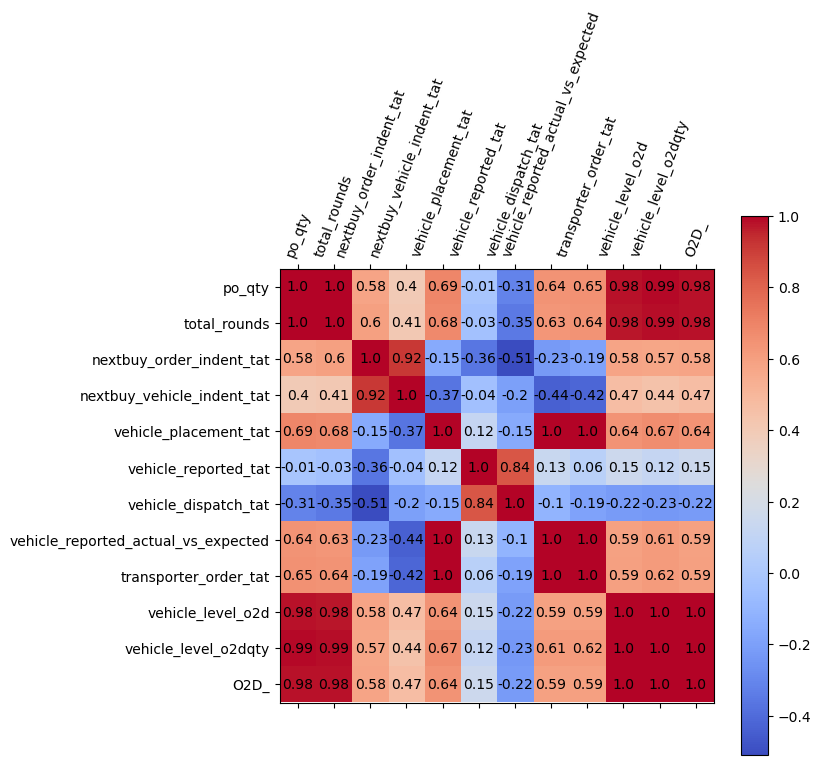

In [354]:
df_reset = temp.reset_index(drop = True)

corr_matrix = df_reset.corr()
fig, ax = plt.subplots(figsize=(7, 7))

cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)

ticks = np.arange(0, len(corr_matrix.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=70)
ax.set_yticklabels(corr_matrix.columns)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        ax.text(j, i, round(corr_matrix.iloc[i, j], 2), ha='center', va='center', color='black')

plt.show()


In [281]:
"""

Which routes have more O2D

"""

'\n\nWhich routes have more O2D\n\n'

In [391]:
df2.groupby(['transporter_type','Month',  'Tons_Bucket', 'rmc_category'])['o2d_'].mean().reset_index()

,transporter_type,Month,Tons_Bucket,rmc_category,o2d_
0,Bizongo,April-2024,0-200 Tons,Aluminum,3.330801
1,Bizongo,April-2024,200-400 Tons,Steel,12.773370
2,Bizongo,April-2024,400+,Steel,15.206326
3,Bizongo,May-2024,0-200 Tons,Aluminum,3.675937
4,Bizongo,May-2024,0-200 Tons,Steel,2.939724
5,Seller,April-2024,0-200 Tons,Aluminum,2.538027
6,Seller,April-2024,0-200 Tons,Steel,3.000000
7,Seller,April-2024,200-400 Tons,Steel,5.568017
8,Seller,April-2024,400+,Steel,7.432792
9,Seller,December-2023,0-200 Tons,Aluminum,1.959478


In [282]:
df['route'] = df['origin'].str.lower() + '-' + df['destination'].str.lower()

def value_counts(series):
    return series.value_counts().to_dict()
    
df.pivot_table(
    index=['route'],
    columns = 'Month',
    aggfunc={
        'po_qty': value_counts,
        'total_rounds' : value_counts,
        'po_number': 'count',
        'O2D_': 'mean',
        'category': value_counts,
        'dispatched_qty':mean
    }
).fillna(0).round(2)

O2D_                      category  \
Month                        April   May                   April   
route                                                              
durgapur-jaipur              14.08  3.74     {'RMC - Steel': 14}   
durgapur-raipur - rajasthan   0.00  0.00                       0   
durgapur-sikendarabad        15.38  0.00     {'RMC - Steel': 27}   
jaipur-ghaziabad              0.00  5.81                       0   
kolkata-jharkhand             0.00  5.98                       0   
raipur-gandhinagar            1.98  3.03  {'RMC - Aluminium': 2}   
raipur-jalna                 14.24  0.00     {'RMC - Steel': 23}   
raipur-kheda                  6.00  2.34  {'RMC - Aluminium': 1}   
raipur-varanasi               2.45  0.00  {'RMC - Aluminium': 1}   
visakhapatnam-kheda           0.00  4.19                       0   
visakhapatnam-medak           0.00  2.07                       0   

                                                    dispatched_qty         \
Month                                           May          April    May   
route                                                                       
durgapur-jaipur                  {'RMC - Steel': 7}          36.31  40.31   
durgapur-raipur - rajasthan      {'RMX - Steel': 1}           0.00  40.92   
durgapur-sikendarabad                             0          33.17   0.00   
jaipur-ghaziabad             {'RMC - Aluminium': 1}           0.00  25.60   
kolkata-jharkhand            {'RMC - Aluminium': 3}           0.00  24.50   
raipur-gandhinagar           {'RMC - Aluminium': 2}          29.48  32.23   
raipur-jalna                                      0          34.18   0.00   
raipur-kheda                 {'RMC - Aluminium': 4}          28.33  28.96   
raipur-varanasi                                   0          12.07   0.00   
visakhapatnam-kheda          {'RMC - Aluminium': 2}           0.00  39.99   
visakhapatnam-medak          {'RMC - Aluminium': 1}           0.00  30.00   

                            po_number                       po_qty  \
Month                           April  May                   April   
route                                                                
durgapur-jaipur                  14.0  7.0             {500.0: 14}   
durgapur-raipur - rajasthan       0.0  1.0                       0   
durgapur-sikendarabad            27.0  0.0  {600.0: 17, 300.0: 10}   
jaipur-ghaziabad                  0.0  1.0                       0   
kolkata-jharkhand                 0.0  3.0                       0   
raipur-gandhinagar                2.0  2.0               {60.0: 2}   
raipur-jalna                     23.0  0.0   {500.0: 15, 300.0: 8}   
raipur-kheda                      1.0  4.0               {30.0: 1}   
raipur-varanasi                   1.0  0.0               {12.0: 1}   
visakhapatnam-kheda               0.0  2.0                       0   
visakhapatnam-medak               0.0  1.0                       0   

                                                      total_rounds  \
Month                                        May             April   
route                                                                
durgapur-jaipur              {200.0: 5, 84.0: 2}          {14: 14}   
durgapur-raipur - rajasthan            {42.0: 1}                 0   
durgapur-sikendarabad                          0  {17: 17, 10: 10}   
jaipur-ghaziabad                       {25.0: 1}                 0   
kolkata-jharkhand                      {75.0: 3}                 0   
raipur-gandhinagar            {30.0: 1, 40.0: 1}            {2: 2}   
raipur-jalna                                   0    {15: 15, 8: 8}   
raipur-kheda                  {50.0: 2, 75.0: 2}            {1: 1}   
raipur-varanasi                                0            {1: 1}   
visakhapatnam-kheda                    {40.0: 2}                 0   
visakhapatnam-medak                    {30.0: 1}                 0   

                                    

In [283]:
df['route'] = df['origin'].str.lower() + '-' + df['destination'].str.lower()

def value_counts(series):
    return series.value_counts().to_dict()
    
df.pivot_table(
    index=['route'],
    columns = 'Month',
    aggfunc={
        'po_qty': value_counts,
        'total_rounds' : value_counts,
        'po_number': 'count',
        'O2D_': 'mean',
        'dispatched_qty':mean
    }
).fillna(0).round(2)

O2D_       dispatched_qty        po_number       \
Month                        April   May          April    May     April  May   
route                                                                           
durgapur-jaipur              14.08  3.74          36.31  40.31      14.0  7.0   
durgapur-raipur - rajasthan   0.00  0.00           0.00  40.92       0.0  1.0   
durgapur-sikendarabad        15.38  0.00          33.17   0.00      27.0  0.0   
jaipur-ghaziabad              0.00  5.81           0.00  25.60       0.0  1.0   
kolkata-jharkhand             0.00  5.98           0.00  24.50       0.0  3.0   
raipur-gandhinagar            1.98  3.03          29.48  32.23       2.0  2.0   
raipur-jalna                 14.24  0.00          34.18   0.00      23.0  0.0   
raipur-kheda                  6.00  2.34          28.33  28.96       1.0  4.0   
raipur-varanasi               2.45  0.00          12.07   0.00       1.0  0.0   
visakhapatnam-kheda           0.00  4.19           0.00  39.99       0.0  2.0   
visakhapatnam-medak           0.00  2.07           0.00  30.00       0.0  1.0   

                                             po_qty                       \
Month                                         April                  May   
route                                                                      
durgapur-jaipur                         {500.0: 14}  {200.0: 5, 84.0: 2}   
durgapur-raipur - rajasthan                       0            {42.0: 1}   
durgapur-sikendarabad        {600.0: 17, 300.0: 10}                    0   
jaipur-ghaziabad                                  0            {25.0: 1}   
kolkata-jharkhand                                 0            {75.0: 3}   
raipur-gandhinagar                        {60.0: 2}   {30.0: 1, 40.0: 1}   
raipur-jalna                  {500.0: 15, 300.0: 8}                    0   
raipur-kheda                              {30.0: 1}   {50.0: 2, 75.0: 2}   
raipur-varanasi                           {12.0: 1}                    0   
visakhapatnam-kheda                               0            {40.0: 2}   
visakhapatnam-medak                               0            {30.0: 1}   

                                 total_rounds                
Month                                   April           May  
route                                                        
durgapur-jaipur                      {14: 14}  {5: 5, 2: 2}  
durgapur-raipur - rajasthan                 0        {1: 1}  
durgapur-sikendarabad        {17: 17, 10: 10}             0  
jaipur-ghaziabad                            0        {1: 1}  
kolkata-jharkhand                           0        {3: 3}  
raipur-gandhinagar                     {2: 2}        {1: 2}  
raipur-jalna                   {15: 15, 8: 8}             0  
raipur-kheda                           {1: 1}        {2: 4}  
raipur-varanasi                        {1: 1}             0  
visakhapatnam-kheda                         0        {2: 2}  
visakhapatnam-medak                         0        {1: 1}

In [392]:
df['route'] = df['origin'].str.lower() + '-' + df['destination'].str.lower()

def value_counts(series):
    return series.value_counts().to_dict()
    
df.pivot_table(
    index=['route', 'category'],
    columns = 'Month',
    aggfunc={
        'po_qty': value_counts,
        'total_rounds' : value_counts,
        'po_number': 'count',
        'O2D_': 'mean',
        'dispatched_qty':['min', 'max']
    }
).fillna(0).round(2)

O2D_       dispatched_qty  \
                                              mean                  max   
Month                                        April   May          April   
route                       category                                      
durgapur-jaipur             RMC - Steel      14.08  3.74          42.79   
durgapur-raipur - rajasthan RMX - Steel       0.00  0.00           0.00   
durgapur-sikendarabad       RMC - Steel      15.38  0.00          42.16   
jaipur-ghaziabad            RMC - Aluminium   0.00  5.81           0.00   
kolkata-jharkhand           RMC - Aluminium   0.00  5.98           0.00   
raipur-gandhinagar          RMC - Aluminium   1.98  3.03          29.71   
raipur-jalna                RMC - Steel      14.24  0.00          42.62   
raipur-kheda                RMC - Aluminium   6.00  2.34          28.33   
raipur-varanasi             RMC - Aluminium   2.45  0.00          12.07   
visakhapatnam-kheda         RMC - Aluminium   0.00  4.19           0.00   
visakhapatnam-medak         RMC - Aluminium   0.00  2.07           0.00   

                                                                 po_number  \
                                                      min            count   
Month                                          May  April    May     April   
route                       category                                         
durgapur-jaipur             RMC - Steel      42.44  30.03  31.48      14.0   
durgapur-raipur - rajasthan RMX - Steel      40.92   0.00  40.92       0.0   
durgapur-sikendarabad       RMC - Steel       0.00  22.90   0.00      27.0   
jaipur-ghaziabad            RMC - Aluminium  25.60   0.00  25.60       0.0   
kolkata-jharkhand           RMC - Aluminium  28.10   0.00  20.50       0.0   
raipur-gandhinagar          RMC - Aluminium  34.48  29.26  29.98       2.0   
raipur-jalna                RMC - Steel       0.00  18.83   0.00      23.0   
raipur-kheda                RMC - Aluminium  39.96  28.33   8.89       1.0   
raipur-varanasi             RMC - Aluminium   0.00  12.07   0.00       1.0   
visakhapatnam-kheda         RMC - Aluminium  39.99   0.00  39.99       0.0   
visakhapatnam-medak         RMC - Aluminium  30.00   0.00  30.00       0.0   

                                                                  po_qty  \
                                                            value_counts   
Month                                        May                   April   
route                       category                                       
durgapur-jaipur             RMC - Steel      7.0             {500.0: 14}   
durgapur-raipur - rajasthan RMX - Steel      1.0                       0   
durgapur-sikendarabad       RMC - Steel      0.0  {600.0: 17, 300.0: 10}   
jaipur-ghaziabad            RMC - Aluminium  1.0                       0   
kolkata-jharkhand           RMC - Aluminium  3.0                       0   
raipur-gandhinagar          RMC - Aluminium  2.0               {60.0: 2}   
raipur-jalna                RMC - Steel      0.0   {500.0: 15, 300.0: 8}   
raipur-kheda                RMC - Aluminium  4.0               {30.0: 1}   
raipur-varanasi             RMC - Aluminium  0.0               {12.0: 1}   
visakhapatnam-kheda         RMC - Aluminium  2.0                       0   
visakhapatnam-medak         RMC - Aluminium  1.0                       0   

                                                                  \
                                                                   
Month                                                        May   
route                       category                               
durgapur-jaipur             RMC - Steel      {200.0: 5, 84.0: 2}   
durgapur-raipur - rajasthan RMX - Steel                {42.0: 1}   
durgapur-sikendarabad       RMC - Steel                        0   
jaipur-ghaziabad            RMC - Aluminium            {25.0: 1}   
kolkata-jharkhand           RMC - Aluminium            {75.0: 3}

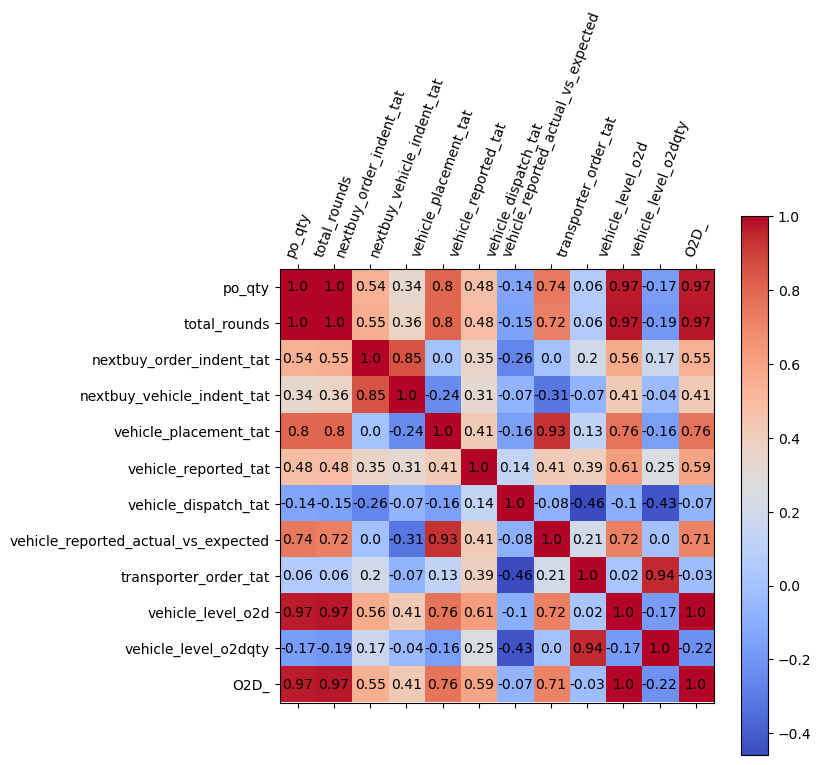

In [365]:
### Correlation on routes

route_temp = df.groupby('route')[['po_qty', 'total_rounds', 'nextbuy_order_indent_tat','nextbuy_vehicle_indent_tat'	,'vehicle_placement_tat',	'vehicle_reported_tat',	'vehicle_dispatch_tat'	,'vehicle_reported_actual_vs_expected'	,'transporter_order_tat',	'vehicle_level_o2d'	,'vehicle_level_o2dqty'	,'O2D_']].mean()

df_reset = route_temp.reset_index(drop = True)

corr_matrix = df_reset.corr()
fig, ax = plt.subplots(figsize=(7, 7))

cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)

ticks = np.arange(0, len(corr_matrix.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=70)
ax.set_yticklabels(corr_matrix.columns)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        ax.text(j, i, round(corr_matrix.iloc[i, j], 2), ha='center', va='center', color='black')

plt.show()


In [366]:
route_temp.corr()

,po_qty,total_rounds,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,vehicle_level_o2d,vehicle_level_o2dqty,O2D_
po_qty,1.000000,0.997326,0.542637,0.336708,0.799085,0.480592,-0.136431,0.739676,0.064036,0.968613,-0.171816,0.966707
total_rounds,0.997326,1.000000,0.550908,0.357124,0.796429,0.483396,-0.152122,0.718207,0.064679,0.973791,-0.185729,0.973510
nextbuy_order_indent_tat,0.542637,0.550908,1.000000,0.853755,0.004657,0.350703,-0.264868,0.000015,0.201627,0.564966,0.171714,0.547695
nextbuy_vehicle_indent_tat,0.336708,0.357124,0.853755,1.000000,-0.237563,0.313051,-0.069330,-0.314380,-0.068896,0.413457,-0.036690,0.413674
vehicle_placement_tat,0.799085,0.796429,0.004657,-0.237563,1.000000,0.407876,-0.161656,0.929233,0.125445,0.760384,-0.164539,0.758546
vehicle_reported_tat,0.480592,0.483396,0.350703,0.313051,0.407876,1.000000,0.137754,0.409672,0.388825,0.613979,0.248604,0.591763
vehicle_dispatch_tat,-0.136431,-0.152122,-0.264868,-0.069330,-0.161656,0.137754,1.000000,-0.083013,-0.458723,-0.099378,-0.428122,-0.067736
vehicle_reported_actual_vs_expected,0.739676,0.718207,0.000015,-0.314380,0.929233,0.409672,-0.083013,1.000000,0.207743,0.717550,0.001837,0.709859
transporter_order_tat,0.064036,0.064679,0.201627,-0.068896,0.125445,0.388825,-0.458723,0.207743,1.000000,0.024708,0.944031,-0.025255
vehicle_level_o2d,0.968613,0.973791,0.564966,0.413457,0.760384,0.613979,-0.099378,0.717550,0.024708,1.000000,-0.173955,0.998096


In [285]:
# dispatched_df = df[df['dispatched_df']>]

In [286]:
df['dispatched_qty'].value_counts().reset_index().sort_values(by = 'dispatched_qty')

,dispatched_qty,count
10,8.890000,1
18,12.066000,1
37,18.830000,1
38,18.870001,1
17,20.500000,1
...,...,...
3,42.439999,2
5,42.610001,2
21,42.619999,1
69,42.630001,1


In [287]:
df.groupby('category')['dispatched_qty'].median()

category
RMC - Aluminium    29.260000
RMC - Steel        34.820000
RMX - Steel        40.919998
Name: dispatched_qty, dtype: float64

In [288]:
df['dispatched_qty'].median()

34.47999954223633

In [289]:
df[df['dispatched_qty']<30][['po_number', 'category', 'po_qty', 'origin','destination', 'dispatched_qty', 'total_rounds','order','vehicle_unloaded_ts']]

,po_number,category,po_qty,origin,destination,dispatched_qty,total_rounds,order,vehicle_unloaded_ts
1,PO/25/HA/111,RMC - Steel,600.0,Durgapur,Sikendarabad,25.129999,17,1.0,04/28/2024 15:00:00
18,PO/25/HA/128,RMC - Steel,300.0,Durgapur,Sikendarabad,29.940001,10,3.0,05/09/2024 12:00:00
20,PO/25/HA/128,RMC - Steel,300.0,Durgapur,Sikendarabad,25.740000,10,2.0,05/09/2024 15:00:00
24,PO/25/HA/128,RMC - Steel,300.0,Durgapur,Sikendarabad,22.900000,10,1.0,05/11/2024 2:00:00
50,PO/25/MH/124,RMC - Aluminium,12.0,Raipur,Varanasi,12.066000,1,1.0,4/20/2024 17:56:00
51,PO/25/MH/271,RMC - Aluminium,75.0,Kolkata,Jharkhand,20.500000,3,1.0,5/6/2024 18:20
52,PO/25/MH/271,RMC - Aluminium,75.0,Kolkata,Jharkhand,24.910000,3,2.0,5/8/2024 18:52
53,PO/25/MH/271,RMC - Aluminium,75.0,Kolkata,Jharkhand,28.100000,3,3.0,NaN
54,PO/25/MH/302,RMC - Aluminium,30.0,Raipur,Gandhinagar,29.980000,1,1.0,5/14/2024 19:17:00
58,PO/25/MH/361,RMC - Aluminium,50.0,Raipur,Kheda,8.890000,2,1.0,05/22/2024 19:45:00


In [290]:
df[df['po_number'] == 'PO/25/MH/361'][['po_number', 'category', 'po_qty', 'origin','destination', 'dispatched_qty', 'total_rounds','order','vehicle_unloaded_ts']]


,po_number,category,po_qty,origin,destination,dispatched_qty,total_rounds,order,vehicle_unloaded_ts
57,PO/25/MH/361,RMC - Aluminium,50.0,Raipur,Kheda,38.029999,2,2.0,05/22/2024 19:45:00
58,PO/25/MH/361,RMC - Aluminium,50.0,Raipur,Kheda,8.890000,2,1.0,05/22/2024 19:45:00


In [390]:
df[df['po_number'] == 'PO/25/MH/271'][['po_number', 'category', 'po_qty', 'origin','destination', 'dispatched_qty', 'total_rounds','order','po_ts','nextbuy_vehicle_indent_ts','vehicle_dispatched_ts', 'vehicle_unloaded_ts', 'O2D_', 'o2d_']]


,po_number,category,po_qty,origin,destination,dispatched_qty,total_rounds,order,po_ts,nextbuy_vehicle_indent_ts,vehicle_dispatched_ts,vehicle_unloaded_ts,O2D_,o2d_
51,PO/25/MH/271,RMC - Aluminium,75.0,Kolkata,Jharkhand,20.50,3,1.0,2024-05-01 12:21:15,05/02/2024 12:05:40,5/3/2024 23:45,5/6/2024 18:20,2.474824,6.05562
52,PO/25/MH/271,RMC - Aluminium,75.0,Kolkata,Jharkhand,24.91,3,2.0,2024-05-01 12:21:15,05/06/2024 14:00:00,05/07/2024 23:50:00,5/8/2024 18:52,6.478282,6.05562
53,PO/25/MH/271,RMC - Aluminium,75.0,Kolkata,Jharkhand,28.10,3,3.0,2024-05-01 12:21:15,05/06/2024 14:00:00,5/10/2024 11:56:00,NaN,8.982455,6.05562


In [292]:

df[df['po_number'] == 'PO/25/MH/88'][['po_number', 'category', 'po_qty', 'origin','destination', 'dispatched_qty', 'total_rounds','order','vehicle_unloaded_ts']]


,po_number,category,po_qty,origin,destination,dispatched_qty,total_rounds,order,vehicle_unloaded_ts
71,PO/25/MH/88,RMC - Steel,500.0,Raipur,Jalna,34.860001,15,8.0,04/26/2024 16:30:00
72,PO/25/MH/88,RMC - Steel,500.0,Raipur,Jalna,18.870001,15,2.0,04/27/24 12:00:00
73,PO/25/MH/88,RMC - Steel,500.0,Raipur,Jalna,18.830000,15,1.0,04/27/24 13:00:00
74,PO/25/MH/88,RMC - Steel,500.0,Raipur,Jalna,35.270000,15,14.0,04/27/24 16:30:00
75,PO/25/MH/88,RMC - Steel,500.0,Raipur,Jalna,34.889999,15,10.0,04/29/2024 13:18:00
76,PO/25/MH/88,RMC - Steel,500.0,Raipur,Jalna,34.660000,15,3.0,04/29/24 20:31:00
77,PO/25/MH/88,RMC - Steel,500.0,Raipur,Jalna,34.830002,15,7.0,04/30/2024 17:50:00
78,PO/25/MH/88,RMC - Steel,500.0,Raipur,Jalna,35.430000,15,15.0,04/30/24 16:00:00
79,PO/25/MH/88,RMC - Steel,500.0,Raipur,Jalna,34.869999,15,9.0,05/05/2024 9:00:00
80,PO/25/MH/88,RMC - Steel,500.0,Raipur,Jalna,34.700001,15,4.0,05/07/2024 16:00:00


In [293]:

df[df['po_number'] == 'PO/25/HA/128'][['po_number', 'category', 'po_qty', 'origin','destination', 'dispatched_qty', 'total_rounds','order','vehicle_unloaded_ts']]


,po_number,category,po_qty,origin,destination,dispatched_qty,total_rounds,order,vehicle_unloaded_ts
17,PO/25/HA/128,RMC - Steel,300.0,Durgapur,Sikendarabad,34.330002,10,9.0,05/07/2024 23:00:00
18,PO/25/HA/128,RMC - Steel,300.0,Durgapur,Sikendarabad,29.940001,10,3.0,05/09/2024 12:00:00
19,PO/25/HA/128,RMC - Steel,300.0,Durgapur,Sikendarabad,30.430000,10,7.0,05/09/2024 12:00:00
20,PO/25/HA/128,RMC - Steel,300.0,Durgapur,Sikendarabad,25.740000,10,2.0,05/09/2024 15:00:00
21,PO/25/HA/128,RMC - Steel,300.0,Durgapur,Sikendarabad,30.379999,10,4.0,05/10/2024 11:00:00
22,PO/25/HA/128,RMC - Steel,300.0,Durgapur,Sikendarabad,30.420000,10,6.0,05/10/2024 1:00:00
23,PO/25/HA/128,RMC - Steel,300.0,Durgapur,Sikendarabad,34.430000,10,10.0,05/11/2024 14:00:00
24,PO/25/HA/128,RMC - Steel,300.0,Durgapur,Sikendarabad,22.900000,10,1.0,05/11/2024 2:00:00
25,PO/25/HA/128,RMC - Steel,300.0,Durgapur,Sikendarabad,31.020000,10,8.0,05/15/24 11:00:00
26,PO/25/HA/128,RMC - Steel,300.0,Durgapur,Sikendarabad,30.410000,10,5.0,5/11/2024 16:00:00


In [394]:

df[df['po_number'] == 'PO/25/HA/111'][['po_number', 'category', 'po_qty', 'origin','destination', 'dispatched_qty', 'total_rounds','order','vehicle_unloaded_ts']]


,po_number,category,po_qty,origin,destination,dispatched_qty,total_rounds,order,vehicle_unloaded_ts
0,PO/25/HA/111,RMC - Steel,600.0,Durgapur,Sikendarabad,30.000000,17,2.0,04/27/24 16:00:00
1,PO/25/HA/111,RMC - Steel,600.0,Durgapur,Sikendarabad,25.129999,17,1.0,04/28/2024 15:00:00
2,PO/25/HA/111,RMC - Steel,600.0,Durgapur,Sikendarabad,42.040001,17,15.0,05/02/2024 13:00:00
3,PO/25/HA/111,RMC - Steel,600.0,Durgapur,Sikendarabad,41.520000,17,13.0,05/02/2024 13:30:24
4,PO/25/HA/111,RMC - Steel,600.0,Durgapur,Sikendarabad,33.790001,17,10.0,05/02/2024 18:00:00
5,PO/25/HA/111,RMC - Steel,600.0,Durgapur,Sikendarabad,42.160000,17,17.0,05/04/2024 20:00:00
6,PO/25/HA/111,RMC - Steel,600.0,Durgapur,Sikendarabad,42.119999,17,16.0,05/05/2024 16:00:00
7,PO/25/HA/111,RMC - Steel,600.0,Durgapur,Sikendarabad,41.150002,17,11.0,05/05/2024 19:00:00
8,PO/25/HA/111,RMC - Steel,600.0,Durgapur,Sikendarabad,31.030001,17,6.0,05/06/2024 10:00:00
9,PO/25/HA/111,RMC - Steel,600.0,Durgapur,Sikendarabad,41.680000,17,14.0,05/06/2024 17:00:00


In [395]:
df.pivot_table(index='category', columns = ['Month'], aggfunc={'dispatched_qty':mean})

dispatched_qty           
Month                    April        May
category                                 
RMC - Aluminium      24.840250  29.131363
RMC - Steel          34.218906  40.305714
RMX - Steel                NaN  40.919998

"""
### Comparision of O2D, on both types of transporters
"""

In [326]:
df2['seller_po_creation_date'] = df2['seller_po_creation_date'].astype(str)
def safe_parse(date_str):
    try:
        return parser.parse(date_str)
    except (ValueError, TypeError):
        return pd.NaT

df2['seller_po_creation_date'] = df2['seller_po_creation_date'].apply(safe_parse)
df2['Month'] = df2['seller_po_creation_date'].dt.strftime('%B-%Y')

In [327]:
df2.groupby('transporter_type')['o2d_'].mean().reset_index()

,transporter_type,o2d_
0,Bizongo,6.590171
1,Seller,3.523579


In [378]:
temp1 = df2[df2['Month'].isin(['April-2024', 'May-2024'])]
temp1.pivot_table(index = 'transporter_type', columns = ['rmc_category', 'Month'], aggfunc = {'o2d_' : 'mean'})

o2d_                               
rmc_category       Aluminum                Steel          
Month            April-2024  May-2024 April-2024  May-2024
transporter_type                                          
Bizongo            3.330801  3.675937  14.233144  2.939724
Seller             2.538027  2.249995   5.504086  2.639657

In [328]:
df2.groupby(['transporter_type', 'rmc_category'])[['o2d_']].mean().reset_index()

,transporter_type,rmc_category,o2d_
0,Bizongo,Aluminum,3.560891
1,Bizongo,Steel,9.998111
2,Seller,Aluminum,2.236394
3,Seller,Steel,5.079516


In [329]:
def value_counts(series):
    return series.value_counts().to_dict()

def mean(series):
    return series.mean()
    
df.pivot_table(
    index=['transporter_type'],
    columns = ['rmc_category','Month'],
    aggfunc={
        'po_qty': value_counts,
        'total_rounds' : value_counts,
        'po_number': 'count',
        'O2D_': 'mean',
        'dispatched_qty':['min', 'max']
    }
).fillna(0).round(2)

O2D_                    dispatched_qty                \
                     mean                               max                 
rmc_category     Aluminum        Steel             Aluminum         Steel   
Month               April   May  April   May          April    May  April   
transporter_type                                                            
Bizongo               3.1  4.56  14.69  3.74          29.71  39.99  42.79   

                                                     po_number                \
                             min                         count                 
rmc_category            Aluminum        Steel         Aluminum     Steel       
Month               May    April   May  April    May     April May April May   
transporter_type                                                               
Bizongo           42.44    12.07  8.89  18.83  31.48         4  10    64   8   

                                       po_qty  \
                                 value_counts   
rmc_category                         Aluminum   
Month                                   April   
transporter_type                                
Bizongo           {60.0: 2, 12.0: 1, 30.0: 1}   

                                                                 \
                                                                  
rmc_category                                                      
Month                                                       May   
transporter_type                                                  
Bizongo           {75.0: 3, 30.0: 2, 40.0: 2, 50.0: 2, 25.0: 1}   

                                                     \
                                                      
rmc_category                                  Steel   
Month                                         April   
transporter_type                                      
Bizongo           {500.0: 29, 300.0: 18, 600.0: 17}   

                                                total_rounds  \
                                                value_counts   
rmc_category                                        Aluminum   
Month                                      May         April   
transporter_type                                               
Bizongo           {200.0: 5, 84.0: 2, 42.0: 1}  {1: 2, 2: 2}   

                                                                              \
                                                                               
rmc_category                                                           Steel   
Month                            May                                   April   
transporter_type                                                               
Bizongo           {2: 4, 1: 3, 3: 3}  {17: 17, 15: 15, 14: 14, 10: 10, 8: 8}   

                                      
                                      
rmc_category                          
Month                            May  
transporter_type                      
Bizongo           {5: 5, 2: 2, 1: 1}

In [332]:
def value_counts(series):
    return series.value_counts().to_dict()

def mean(series):
    return series.mean()
    
df2.pivot_table(
    index=['transporter_type', 'Month'],
    columns = ['rmc_category'],
    aggfunc={
        'po_quantity': value_counts,
        'seller_po_number': 'count',
        'o2d_': 'mean',
        'po_quantity':['min', 'max']
    }
).fillna(0).round(2).reset_index().sort_values(by = ['transporter_type', 'Month'])

transporter_type           Month     o2d_        po_quantity  \
                                                  mean                max   
rmc_category                                  Aluminum  Steel    Aluminum   
0                     Bizongo      April-2024     3.33  14.23       60.00   
1                     Bizongo        May-2024     3.68   2.94       75.00   
2                      Seller      April-2024     2.54   5.50       65.00   
3                      Seller   December-2023     1.96   5.66      125.00   
4                      Seller   February-2024     2.94   4.47      200.00   
5                      Seller    January-2024     1.65   5.64      100.00   
6                      Seller      March-2024     1.46   5.73      150.00   
7                      Seller        May-2024     2.25   2.64       90.00   
8                      Seller   November-2023     3.75   3.60       29.38   
9                      Seller    October-2023     3.00   0.00       50.00   
10                     Seller  September-2023     1.00   0.00       20.00   

                                     seller_po_number        
                          min                   count        
rmc_category   Steel Aluminum  Steel         Aluminum Steel  
0              600.0     12.0  300.0              3.0   5.0  
1              200.0     25.0   42.0              6.0   3.0  
2              504.0     10.0   10.0             11.0  11.0  
3             1000.0     12.0   12.0             17.0  16.0  
4              500.0      5.0   10.0             26.0  17.0  
5              500.0      6.0   10.0             12.0  18.0  
6              320.0     10.0   20.0             25.0  16.0  
7              400.0     25.0    9.0             10.0   5.0  
8              500.0     10.0   14.0              6.0   8.0  
9                0.0     10.0    0.0              2.0   0.0  
10               0.0     20.0    0.0              1.0   0.0

In [403]:
df.head()

,sno,po_number,po_qty,seller_po_creation_date_x,category,dispatched_qty,origin,destination,dispatch_week,po_ts,nextbuy_order_indent_ts,nextbuy_vehicle_indent_ts,transporter_order_indent_ts,transporter_order_indent_acceptance_ts,vehicle_placement_ts,expected_date_of_vehicle_reporting,vehicle_reported_ts,vehicle_loaded_ts,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,vehicle_level_o2d,vehicle_level_o2dqty,O2D_,buyer_name,seller_name,seller_po_number,seller_po_status,transporter_type,rmc_category,seller_po_creation_date_y,max_buyer_invoice_date,buyer_invoice_item_quantity,po_quantity,order_completion_percentage,order_status,o2d_,o2d_real,O2D_Bucket,Tons_Bucket,cumulative_rank,order,total_rounds,Month,route
0,37,PO/25/HA/111,600.0,2024-04-16 12:24:35.313,RMC - Steel,30.000000,Durgapur,Sikendarabad,April 4 Week,2024-04-16 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,04/24/2024 7:31:00,4/19/2024 23:59:59,04/24/2024 4:00:00,04/24/2024 14:25:00,04/24/24 22:00:00,04/26/24 11:00:00,04/27/24 14:14:00,04/27/24 16:00:00,0.936412,0.000012,6.630567,-0.146516,0.750012,4.166667,0.747928,8.17043,245.113007,8.170434,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Accepted,Bizongo,Steel,2024-04-16,2024-05-06,600.0,600.0,100.0,Completed,14.759483,20.0,6+ days,400+,2.0,2.0,17,April,durgapur-sikendarabad
1,5,PO/25/HA/111,600.0,2024-04-16 12:24:35.313,RMC - Steel,25.129999,Durgapur,Sikendarabad,April 3 Week,2024-04-16 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,4/22/2024 11:00:00,4/19/2024 23:59:59,04/24/24 4:05:00,04/24/24 14:02:00,04/24/2024 22:15:00,4/26/2024 23:00:00,04/27/2024 16:15:00,04/28/2024 15:00:00,0.936412,0.000012,4.775706,1.711817,0.756956,4.170139,0.747928,8.18085,205.585007,8.180860,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Accepted,Bizongo,Steel,2024-04-16,2024-05-06,600.0,600.0,100.0,Completed,14.759483,20.0,6+ days,400+,1.0,1.0,17,April,durgapur-sikendarabad
2,40,PO/25/HA/111,600.0,2024-04-16 12:24:35.313,RMC - Steel,42.040001,Durgapur,Sikendarabad,May 1 Week,2024-04-16 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,04/29/2024 9:03:00,4/20/2024 23:59:59,04/29/24 5:00:00,04/29/24 17:05:00,04/29/24 21:00:00,5/2/2024 9:00:00,NaN,05/02/2024 13:00:00,0.936412,0.000012,11.694456,-0.168738,0.666678,8.208333,0.747928,13.12880,551.932983,13.128758,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Accepted,Bizongo,Steel,2024-04-16,2024-05-06,600.0,600.0,100.0,Completed,14.759483,20.0,6+ days,400+,15.0,15.0,17,April,durgapur-sikendarabad
3,39,PO/25/HA/111,600.0,2024-04-16 12:24:35.313,RMC - Steel,41.520000,Durgapur,Sikendarabad,May 1 Week,2024-04-16 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,04/28/2024 22:12:00,4/20/2024 23:59:59,4/29/2024 5:00:00,04/29/24 16:29:00,04/29/2024 22:00:00,05/02/2024 9:28:00,05/02/2024 13:01:00,05/02/2024 13:30:24,0.936412,0.000012,11.242373,0.283345,0.708345,8.208333,0.747928,13.17040,546.835999,13.170424,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Accepted,Bizongo,Steel,2024-04-16,2024-05-06,600.0,600.0,100.0,Completed,14.759483,20.0,6+ days,400+,13.0,13.0,17,April,durgapur-sikendarabad
4,38,PO/25/HA/111,600.0,2024-04-16 12:24:35.313,RMC - Steel,33.790001,Durgapur,Sikendarabad,April 4 Week,2024-04-16 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,04/26/24 15:00:00,4/20/2024 23:59:59,04/27/24 5:30:00,04/27/24 11:37:00,04/27/24 22:00:00,05/02/24 9:28:00,05/02/2024 1:46:00,05/02/2024 18:00:00,0.936412,0.000012,8.942373,0.604178,0.687512,6.229167,0.747928,11.17040,377.449005,11.170435,HANNU STEEL PRIVATE LIMIT

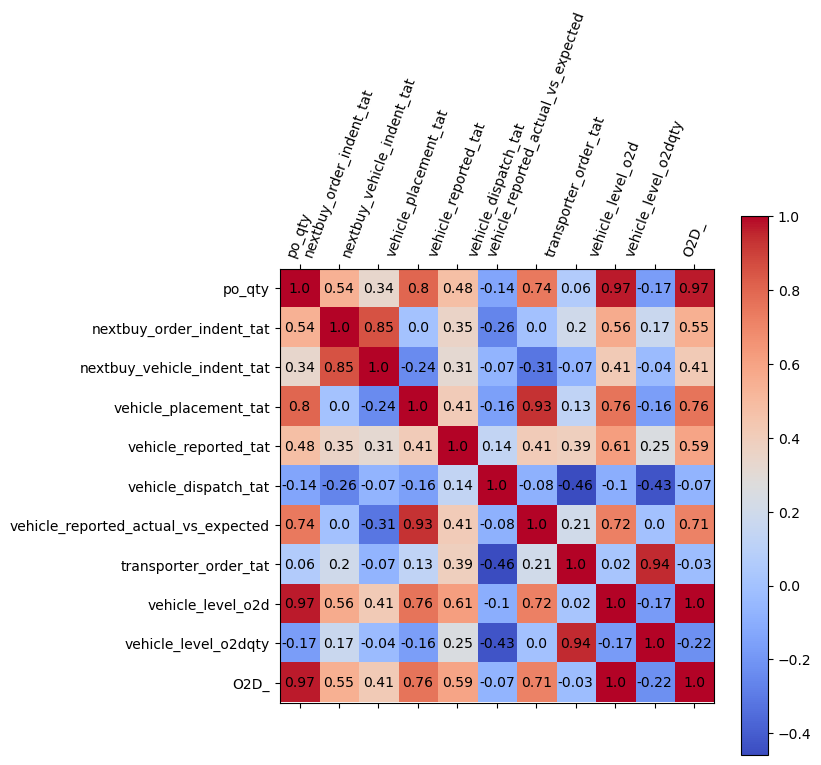

In [451]:
### Correlation on routes
df['route'] = df['origin'] + '-' + df['destination']
route_temp = df.groupby('route')[['po_qty', 'nextbuy_order_indent_tat','nextbuy_vehicle_indent_tat'	,'vehicle_placement_tat',	'vehicle_reported_tat',	'vehicle_dispatch_tat'	,'vehicle_reported_actual_vs_expected'	,'transporter_order_tat',	'vehicle_level_o2d'	,'vehicle_level_o2dqty'	,'O2D_']].mean()

df_reset = route_temp.reset_index(drop = True)

corr_matrix = df_reset.corr()
fig, ax = plt.subplots(figsize=(7, 7))

cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)

ticks = np.arange(0, len(corr_matrix.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=70)
ax.set_yticklabels(corr_matrix.columns)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        ax.text(j, i, round(corr_matrix.iloc[i, j], 2), ha='center', va='center', color='black')

plt.show()
